✅ Accuracy: 0.9875712066286898

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4244
           1       0.99      0.98      0.99      3480

    accuracy                           0.99      7724
   macro avg       0.99      0.99      0.99      7724
weighted avg       0.99      0.99      0.99      7724



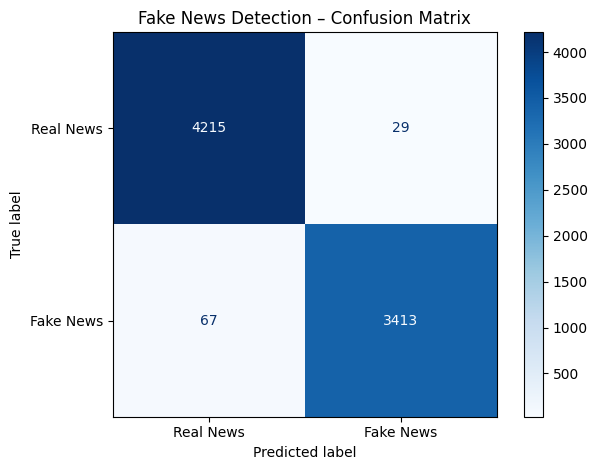

✅ Model and vectorizer saved successfully!
✅ Test set saved to test_data.csv


In [1]:
# 3_model_training.ipynb

import pandas as pd
import pickle
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Project root
BASE_PATH = Path.cwd().parent
PROCESSED_PATH = BASE_PATH / "data" / "processed"

# Load cleaned dataset
cleaned_file = PROCESSED_PATH / "train_cleaned.csv"
df = pd.read_csv(cleaned_file)

X = df["clean_content"]
y = df["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model training
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# Evaluation
y_pred = model.predict(X_test_tfidf)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Real News", "Fake News"]
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Fake News Detection – Confusion Matrix")
plt.tight_layout()
plt.savefig(PROCESSED_PATH / "confusion_matrix.png", dpi=300)
plt.show()

# Save model and vectorizer
with open(PROCESSED_PATH / "fake_news_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open(PROCESSED_PATH / "tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Model and vectorizer saved successfully!")

# Save test data
test_df = pd.DataFrame({"text": X_test, "label": y_test})
test_df.to_csv(PROCESSED_PATH / "test_data.csv", index=False)

print("✅ Test set saved to test_data.csv")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Real News", "Fake News"]
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Fake News Detection – Confusion Matrix")
plt.tight_layout()

# Save image for LinkedIn / GitHub
plt.savefig(os.path.join(PROCESSED_PATH, "confusion_matrix.png"), dpi=300)
plt.show()
